In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

import joblib

### Reading data

In [2]:
peru = pd.read_csv('../dataset/dataset2.csv')
peru

,Fecha entrega del Informe,Tipo de vía,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Categoría del bien,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Área Terreno,Área Construcción,Valor comercial (USD)
0,2020-02-16 00:00:00,1.0,NaN,Piura,Piura,Veintiseis de Octubre,NaN,NaN,"-5,163182","-80,682388",Vivienda Unifamiliar,NaN,NaN,0.0,NaN,En construcción,Costos o reposición (directo),62.50,27.58,25278
1,2019-05-21 00:00:00,1.0,NaN,Lima,Lima,Surquillo,1.0,0.0,"-12,115286","-77,003768",Departamento,NaN,NaN,1.0,NaN,Bueno,Comparación de mercado (directo),9.32,57.47,110807
2,2020-04-11 00:00:00,1.0,NaN,Junín,Satipo,Satipo,0.0,0.0,"-11,235446","-74,629221",Vivienda Unifamiliar,NaN,NaN,7.0,NaN,Regular,Costos o reposición (directo),126.00,84.00,42285
3,2016-05-24 00:00:00,1.0,NaN,Lima,Lima,Santiago de Surco,0.0,0.0,"-12,126384","-76,975707",Oficina,NaN,NaN,0.0,NaN,NaN,Comparación de mercado (directo),8.60,82.34,165503
4,2016-01-12 00:00:00,3.0,NaN,Lima,Lima,Lima,0.0,0.0,"-12,089613","-76,994475",Vivienda Unifamiliar,NaN,NaN,43.0,NaN,NaN,Comparación de mercado (directo),357.55,423.22,711009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,2019-07-18 00:00:00,1.0,NaN,Lima,Lima,Santiago de Surco,0.0,0.0,"-12,079598","-76,976514",Vivienda Unifamiliar,NaN,NaN,34.0,NaN,Bueno,Costos o reposición (directo),306.00,282.80,604241
53250,2017-10-22 00:00:00,3.0,NaN,Lima,Lima,Magdalena del Mar,1.0,0.0,"-12,088102","-77,064252",Departamento,NaN,NaN,4.0,NaN,Bueno,Comparación de mercado (directo),4.98,86.56,132721
53251,2021-05-31 00:00:00,3.0,NaN,Lima,Lima,Lince,0.0,0.0,"-12,087071","-77,035483",Departamento,NaN,NaN,64.0,NaN,Bueno,Comparación de mercado (directo),18.63,65.77,98655
53252,2018-07-11 00:00:00,3.0,NaN,Lima,Lima,Rímac,1.0,0.0,"-12,030869","-77,025853",Departamento,NaN,NaN,4.0,NaN,Bueno,Comparación de mercado (directo),10.08,70.15,79553


In [3]:
dpd = pd.read_excel('../dataset/peru.xlsx')
dpd

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Departamento,Provincia,Distrito,IdUbigeo
0,Amazonas,NaN,NaN,10000
1,Amazonas,Chachapoyas,NaN,10100
2,Amazonas,Chachapoyas,Chachapoyas,10101
3,Amazonas,Chachapoyas,Asunción,10102
4,Amazonas,Chachapoyas,Balsas,10103
...,...,...,...,...
2072,Ucayali,Padre Abad,Curimana,250303
2073,Ucayali,Padre Abad,Neshuya,250304
2074,Ucayali,Padre Abad,Alexander Von Humboldt,250305
2075,Ucayali,Purús,NaN,250400


In [4]:
dpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Departamento  2077 non-null   object
 1   Provincia     2052 non-null   object
 2   Distrito      1856 non-null   object
 3   IdUbigeo      2077 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 65.0+ KB


In [5]:
dpd = dpd.apply(lambda x: x.str.lower() if x.dtype == "object" else x)  
dpd

,Departamento,Provincia,Distrito,IdUbigeo
0,amazonas,NaN,NaN,10000
1,amazonas,chachapoyas,NaN,10100
2,amazonas,chachapoyas,chachapoyas,10101
3,amazonas,chachapoyas,asunción,10102
4,amazonas,chachapoyas,balsas,10103
...,...,...,...,...
2072,ucayali,padre abad,curimana,250303
2073,ucayali,padre abad,neshuya,250304
2074,ucayali,padre abad,alexander von humboldt,250305
2075,ucayali,purús,NaN,250400


In [6]:
departamentos = dpd['Departamento'].unique()
len(departamentos)

25

In [7]:
provincias = dpd['Provincia'].unique()
len(provincias)

197

In [8]:
distritos = dpd['Distrito'].unique()
len(distritos)
                

1708

In [9]:
provincias = [x for x in provincias if str(x) != 'nan']
len(provincias)

196

In [10]:
provincias[0:10]

['chachapoyas',
 'bagua',
 'bongará',
 'condorcanqui',
 'luya',
 'rodríguez de mendoza',
 'utcubamba',
 'huaraz',
 'aija',
 'antonio raymondi']

### Remove trailing newline from the elements of the list

In [11]:
departamentos = list(map(str.strip, departamentos))
departamentos[0:10]

['amazonas',
 'áncash',
 'apurímac',
 'arequipa',
 'ayacucho',
 'cajamarca',
 'callao',
 'cusco',
 'huancavelica',
 'huánuco']

In [12]:
provincias = list(map(str.strip, provincias))
provincias[0:10]

['chachapoyas',
 'bagua',
 'bongará',
 'condorcanqui',
 'luya',
 'rodríguez de mendoza',
 'utcubamba',
 'huaraz',
 'aija',
 'antonio raymondi']

In [13]:
distritos = [x for x in distritos if str(x) != 'nan']
len(distritos)

1707

In [14]:
distritos = list(map(str.strip, distritos))


### Concat names as ONE HOT ENCODING

In [15]:
departamentos = list(map(lambda x: 'Departamento_' + x, departamentos))
departamentos[0:10]

['Departamento_amazonas',
 'Departamento_áncash',
 'Departamento_apurímac',
 'Departamento_arequipa',
 'Departamento_ayacucho',
 'Departamento_cajamarca',
 'Departamento_callao',
 'Departamento_cusco',
 'Departamento_huancavelica',
 'Departamento_huánuco']

In [16]:
provincias = list(map(lambda x: 'Provincia_' + x, provincias))
provincias[0:10]

['Provincia_chachapoyas',
 'Provincia_bagua',
 'Provincia_bongará',
 'Provincia_condorcanqui',
 'Provincia_luya',
 'Provincia_rodríguez de mendoza',
 'Provincia_utcubamba',
 'Provincia_huaraz',
 'Provincia_aija',
 'Provincia_antonio raymondi']

In [17]:
distritos = list(map(lambda x: 'Distrito_' + x, distritos))
distritos[0:10]

['Distrito_chachapoyas',
 'Distrito_asunción',
 'Distrito_balsas',
 'Distrito_cheto',
 'Distrito_chiliquin',
 'Distrito_chuquibamba',
 'Distrito_granada',
 'Distrito_huancas',
 'Distrito_la jalca',
 'Distrito_leimebamba']

In [18]:
### Create dataframe to concat after ONE HOT ENCODING

In [19]:
dpd_df = pd.DataFrame(columns=departamentos+provincias+distritos)
dpd_df

,Departamento_amazonas,Departamento_áncash,Departamento_apurímac,Departamento_arequipa,Departamento_ayacucho,Departamento_cajamarca,Departamento_callao,Departamento_cusco,Departamento_huancavelica,Departamento_huánuco,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus


In [20]:
peru.columns

Index(['Fecha entrega del Informe', 'Tipo de vía', 'Piso', 'Departamento',
       'Provincia', 'Distrito', 'Número de estacionamiento', 'Depósitos',
       'Latitud (Decimal)', 'Longitud (Decimal)', 'Categoría del bien',
       'Posición', 'Número de frentes', 'Edad', 'Elevador',
       'Estado de conservación', 'Método Representado', 'Área Terreno',
       'Área Construcción', 'Valor comercial (USD)'],
      dtype='object')

In [21]:
peru.columns = peru.columns.str.replace(" ", "_")

In [22]:
peru.columns

Index(['Fecha_entrega_del_Informe', 'Tipo_de_vía', 'Piso', 'Departamento',
       'Provincia', 'Distrito', 'Número_de_estacionamiento', 'Depósitos',
       'Latitud_(Decimal)', 'Longitud_(Decimal)', 'Categoría_del_bien',
       'Posición', 'Número_de_frentes', 'Edad', 'Elevador',
       'Estado_de_conservación', 'Método_Representado', 'Área_Terreno',
       'Área_Construcción', 'Valor_comercial_(USD)'],
      dtype='object')

In [23]:
peru.describe().T

,count,mean,std,min,25%,50%,75%,max
Tipo_de_vía,48243.0,1.959745,1.066075e+00,1.0,1.0,2.0,3.00,10.0
Número_de_estacionamiento,45330.0,0.437304,3.357846e+00,0.0,0.0,0.0,1.00,329.0
Depósitos,45261.0,0.253463,9.652704e+00,0.0,0.0,0.0,0.00,2000.0
Número_de_frentes,97.0,1.216495,2.199559e+00,0.0,1.0,1.0,1.00,22.0
Edad,48465.0,15.891922,3.405859e+01,0.0,2.0,8.0,22.00,2018.0
Elevador,116.0,1.181034,8.402809e-01,0.0,0.0,1.0,2.00,2.0
Valor_comercial_(USD),53254.0,393842.189150,1.081877e+06,21.0,100822.0,174391.0,336808.25,75012015.0


In [24]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53254 entries, 0 to 53253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha_entrega_del_Informe  53254 non-null  object 
 1   Tipo_de_vía                48243 non-null  float64
 2   Piso                       21 non-null     object 
 3   Departamento               53254 non-null  object 
 4   Provincia                  53254 non-null  object 
 5   Distrito                   53254 non-null  object 
 6   Número_de_estacionamiento  45330 non-null  float64
 7   Depósitos                  45261 non-null  float64
 8   Latitud_(Decimal)          52391 non-null  object 
 9   Longitud_(Decimal)         52337 non-null  object 
 10  Categoría_del_bien         50805 non-null  object 
 11  Posición                   113 non-null    object 
 12  Número_de_frentes          97 non-null     float64
 13  Edad                       48465 non-null  flo

### Changing DTYPES to columns according to the DICTIONARY OF FIELDS

In [25]:
peru['Área_Terreno'].unique()

array(['62.50', '9.32', '126.00', ..., '474.35', '93.11', '6,212.08'],
      dtype=object)

In [26]:
from datetime import datetime

In [27]:
peru['Área_Terreno'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 53254 entries, 0 to 53253
Series name: Área_Terreno
Non-Null Count  Dtype 
--------------  ----- 
52101 non-null  object
dtypes: object(1)
memory usage: 416.2+ KB


In [28]:
peru['Área_Terreno']

0         62.50
1          9.32
2        126.00
3          8.60
4        357.55
          ...  
53249    306.00
53250      4.98
53251     18.63
53252     10.08
53253    118.40
Name: Área_Terreno, Length: 53254, dtype: object

In [29]:
peru = peru[peru['Área_Terreno'].apply(lambda x: type(x) != datetime or x== 'NaN')]

In [30]:
peru['Área_Terreno']

0         62.50
1          9.32
2        126.00
3          8.60
4        357.55
          ...  
53249    306.00
53250      4.98
53251     18.63
53252     10.08
53253    118.40
Name: Área_Terreno, Length: 53254, dtype: object

In [31]:
peru

,Fecha_entrega_del_Informe,Tipo_de_vía,Piso,Departamento,Provincia,Distrito,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Categoría_del_bien,Posición,Número_de_frentes,Edad,Elevador,Estado_de_conservación,Método_Representado,Área_Terreno,Área_Construcción,Valor_comercial_(USD)
0,2020-02-16 00:00:00,1.0,NaN,Piura,Piura,Veintiseis de Octubre,NaN,NaN,"-5,163182","-80,682388",Vivienda Unifamiliar,NaN,NaN,0.0,NaN,En construcción,Costos o reposición (directo),62.50,27.58,25278
1,2019-05-21 00:00:00,1.0,NaN,Lima,Lima,Surquillo,1.0,0.0,"-12,115286","-77,003768",Departamento,NaN,NaN,1.0,NaN,Bueno,Comparación de mercado (directo),9.32,57.47,110807
2,2020-04-11 00:00:00,1.0,NaN,Junín,Satipo,Satipo,0.0,0.0,"-11,235446","-74,629221",Vivienda Unifamiliar,NaN,NaN,7.0,NaN,Regular,Costos o reposición (directo),126.00,84.00,42285
3,2016-05-24 00:00:00,1.0,NaN,Lima,Lima,Santiago de Surco,0.0,0.0,"-12,126384","-76,975707",Oficina,NaN,NaN,0.0,NaN,NaN,Comparación de mercado (directo),8.60,82.34,165503
4,2016-01-12 00:00:00,3.0,NaN,Lima,Lima,Lima,0.0,0.0,"-12,089613","-76,994475",Vivienda Unifamiliar,NaN,NaN,43.0,NaN,NaN,Comparación de mercado (directo),357.55,423.22,711009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,2019-07-18 00:00:00,1.0,NaN,Lima,Lima,Santiago de Surco,0.0,0.0,"-12,079598","-76,976514",Vivienda Unifamiliar,NaN,NaN,34.0,NaN,Bueno,Costos o reposición (directo),306.00,282.80,604241
53250,2017-10-22 00:00:00,3.0,NaN,Lima,Lima,Magdalena del Mar,1.0,0.0,"-12,088102","-77,064252",Departamento,NaN,NaN,4.0,NaN,Bueno,Comparación de mercado (directo),4.98,86.56,132721
53251,2021-05-31 00:00:00,3.0,NaN,Lima,Lima,Lince,0.0,0.0,"-12,087071","-77,035483",Departamento,NaN,NaN,64.0,NaN,Bueno,Comparación de mercado (directo),18.63,65.77,98655
53252,2018-07-11 00:00:00,3.0,NaN,Lima,Lima,Rímac,1.0,0.0,"-12,030869","-77,025853",Departamento,NaN,NaN,4.0,NaN,Bueno,Comparación de mercado (directo),10.08,70.15,79553


In [32]:
peru['Número_de_estacionamiento'] = peru['Número_de_estacionamiento'].astype('float64')

In [33]:
peru['Latitud_(Decimal)'] = peru['Latitud_(Decimal)'].replace(',','', regex=True)

In [34]:
peru['Latitud_(Decimal)'] = peru['Latitud_(Decimal)'].astype('float64')

In [35]:
peru['Longitud_(Decimal)'] = peru['Longitud_(Decimal)'].replace(',','', regex=True)

In [36]:
peru['Longitud_(Decimal)'] = peru['Longitud_(Decimal)'].astype('float64')

In [37]:
peru['Área_Terreno'] = peru['Área_Terreno'].replace(',','', regex=True)

In [38]:
peru['Área_Terreno'] = peru['Área_Terreno'].astype('float64')

In [39]:
peru['Área_Construcción'] = peru['Área_Construcción'].replace(',','', regex=True)

In [40]:
peru['Área_Construcción'] = peru['Área_Construcción'].astype('float64')

In [41]:
peru.columns

Index(['Fecha_entrega_del_Informe', 'Tipo_de_vía', 'Piso', 'Departamento',
       'Provincia', 'Distrito', 'Número_de_estacionamiento', 'Depósitos',
       'Latitud_(Decimal)', 'Longitud_(Decimal)', 'Categoría_del_bien',
       'Posición', 'Número_de_frentes', 'Edad', 'Elevador',
       'Estado_de_conservación', 'Método_Representado', 'Área_Terreno',
       'Área_Construcción', 'Valor_comercial_(USD)'],
      dtype='object')

In [42]:
peru['Valor_comercial_(USD)'] = peru['Valor_comercial_(USD)'].replace(',','', regex=True)

In [43]:
peru['Valor_comercial_(USD)'] = peru['Valor_comercial_(USD)'].astype('float64')

In [44]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53254 entries, 0 to 53253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha_entrega_del_Informe  53254 non-null  object 
 1   Tipo_de_vía                48243 non-null  float64
 2   Piso                       21 non-null     object 
 3   Departamento               53254 non-null  object 
 4   Provincia                  53254 non-null  object 
 5   Distrito                   53254 non-null  object 
 6   Número_de_estacionamiento  45330 non-null  float64
 7   Depósitos                  45261 non-null  float64
 8   Latitud_(Decimal)          52391 non-null  float64
 9   Longitud_(Decimal)         52337 non-null  float64
 10  Categoría_del_bien         50805 non-null  object 
 11  Posición                   113 non-null    object 
 12  Número_de_frentes          97 non-null     float64
 13  Edad                       48465 non-null  flo

In [45]:
# peru = peru.drop(peru.iloc[:,[19]], axis=1)
# peru

In [46]:
unique_values = peru.apply(lambda col: col.unique())
unique_values


Fecha_entrega_del_Informe    [2020-02-16 00:00:00, 2019-05-21 00:00:00, 202...
Tipo_de_vía                  [1.0, 3.0, 4.0, 2.0, 5.0, nan, 7.0, 9.0, 8.0, ...
Piso                         [nan, DECIMO PRIMER PISO, SEGUNDO PISO, 3, 1, ...
Departamento                 [Piura, Lima, Junín, Áncash, Ucayali, Arequipa...
Provincia                    [Piura, Lima, Satipo, Huaraz, Coronel Portillo...
Distrito                     [Veintiseis de Octubre, Surquillo, Satipo, San...
Número_de_estacionamiento    [nan, 1.0, 0.0, 2.0, 3.0, 21.0, 5.0, 6.0, 10.0...
Depósitos                    [nan, 0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 4.0, 108.0...
Latitud_(Decimal)            [-5163182.0, -12115286.0, -11235446.0, -121263...
Longitud_(Decimal)           [-80682388.0, -77003768.0, -74629221.0, -76975...
Categoría_del_bien           [Vivienda Unifamiliar, Departamento, Oficina, ...
Posición                                             [nan, Exterior, Interior]
Número_de_frentes                              [nan,

In [47]:
for value in unique_values:
    print(value)

['2020-02-16 00:00:00' '2019-05-21 00:00:00' '2020-04-11 00:00:00' ...
 '2020-10-09 00:00:00' '2015-06-29 00:00:00' '2016-03-25 00:00:00']
[ 1.  3.  4.  2.  5. nan  7.  9.  8. 10.  6.]
[nan 'DECIMO PRIMER PISO' 'SEGUNDO PISO' '3' '1'
 'PISO 16 Y ESTACIONAMIENTO 74' '9-10-11' '1 Y 2' '2'
 'Segundo y Tercer piso' '4' 'PISO 1' '6to piso' '1ER PISO'
 'estacionamiento 22' '2DO PISO' '7']
['Piura' 'Lima' 'Junín' 'Áncash' 'Ucayali' 'Arequipa' 'San Martín'
 'Callao' 'Tumbes' 'Loreto' 'Huancavelica' 'La Libertad' 'Puno'
 'Lambayeque' 'Pasco' 'Tacna' 'Huánuco' 'Cusco' 'Cajamarca' 'Apurímac'
 'Moquegua' 'Amazonas' 'Ayacucho' 'Madre de Dios']
['Piura' 'Lima' 'Satipo' 'Huaraz' 'Coronel Portillo' 'Arequipa'
 'Moyobamba' 'Prov. Const. del Callao' 'Zarumilla' 'Maynas' 'San Martín'
 'CHINCHA' 'Trujillo' 'Alto Amazonas' 'Bellavista' 'San Román' 'Santa'
 'Concepción' 'Chiclayo' 'Barranca' 'Chanchamayo' 'Oxapampa' 'Morropón'
 'Huancayo' 'Rioja' 'Tacna' 'Cañete' 'Huancavelica' 'Leoncio Prado'
 'Cusco' 'Hua

In [48]:
peru.loc[:, peru.dtypes==object]

,Fecha_entrega_del_Informe,Piso,Departamento,Provincia,Distrito,Categoría_del_bien,Posición,Estado_de_conservación,Método_Representado
0,2020-02-16 00:00:00,NaN,Piura,Piura,Veintiseis de Octubre,Vivienda Unifamiliar,NaN,En construcción,Costos o reposición (directo)
1,2019-05-21 00:00:00,NaN,Lima,Lima,Surquillo,Departamento,NaN,Bueno,Comparación de mercado (directo)
2,2020-04-11 00:00:00,NaN,Junín,Satipo,Satipo,Vivienda Unifamiliar,NaN,Regular,Costos o reposición (directo)
3,2016-05-24 00:00:00,NaN,Lima,Lima,Santiago de Surco,Oficina,NaN,NaN,Comparación de mercado (directo)
4,2016-01-12 00:00:00,NaN,Lima,Lima,Lima,Vivienda Unifamiliar,NaN,NaN,Comparación de mercado (directo)
...,...,...,...,...,...,...,...,...,...
53249,2019-07-18 00:00:00,NaN,Lima,Lima,Santiago de Surco,Vivienda Unifamiliar,NaN,Bueno,Costos o reposición (directo)
53250,2017-10-22 00:00:00,NaN,Lima,Lima,Magdalena del Mar,Departamento,NaN,Bueno,Comparación de mercado (directo)
53251,2021-05-31 00:00:00,NaN,Lima,Lima,Lince,Departamento,NaN,Bueno,Comparación de mercado (directo)
53252,2018-07-11 00:00:00,NaN,Lima,Lima,Rímac,Departamento,NaN,Bueno,Comparación de mercado (directo)


In [49]:
peru.apply(lambda x: x.str.lower() if x.dtype == "object" else x)  


,Fecha_entrega_del_Informe,Tipo_de_vía,Piso,Departamento,Provincia,Distrito,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Categoría_del_bien,Posición,Número_de_frentes,Edad,Elevador,Estado_de_conservación,Método_Representado,Área_Terreno,Área_Construcción,Valor_comercial_(USD)
0,2020-02-16 00:00:00,1.0,NaN,piura,piura,veintiseis de octubre,NaN,NaN,-5163182.0,-80682388.0,vivienda unifamiliar,NaN,NaN,0.0,NaN,en construcción,costos o reposición (directo),62.50,27.58,25278.0
1,2019-05-21 00:00:00,1.0,NaN,lima,lima,surquillo,1.0,0.0,-12115286.0,-77003768.0,departamento,NaN,NaN,1.0,NaN,bueno,comparación de mercado (directo),9.32,57.47,110807.0
2,2020-04-11 00:00:00,1.0,NaN,junín,satipo,satipo,0.0,0.0,-11235446.0,-74629221.0,vivienda unifamiliar,NaN,NaN,7.0,NaN,regular,costos o reposición (directo),126.00,84.00,42285.0
3,2016-05-24 00:00:00,1.0,NaN,lima,lima,santiago de surco,0.0,0.0,-12126384.0,-76975707.0,oficina,NaN,NaN,0.0,NaN,NaN,comparación de mercado (directo),8.60,82.34,165503.0
4,2016-01-12 00:00:00,3.0,NaN,lima,lima,lima,0.0,0.0,-12089613.0,-76994475.0,vivienda unifamiliar,NaN,NaN,43.0,NaN,NaN,comparación de mercado (directo),357.55,423.22,711009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,2019-07-18 00:00:00,1.0,NaN,lima,lima,santiago de surco,0.0,0.0,-12079598.0,-76976514.0,vivienda unifamiliar,NaN,NaN,34.0,NaN,bueno,costos o reposición (directo),306.00,282.80,604241.0
53250,2017-10-22 00:00:00,3.0,NaN,lima,lima,magdalena del mar,1.0,0.0,-12088102.0,-77064252.0,departamento,NaN,NaN,4.0,NaN,bueno,comparación de mercado (directo),4.98,86.56,132721.0
53251,2021-05-31 00:00:00,3.0,NaN,lima,lima,lince,0.0,0.0,-12087071.0,-77035483.0,departamento,NaN,NaN,64.0,NaN,bueno,comparación de mercado (directo),18.63,65.77,98655.0
53252,2018-07-11 00:00:00,3.0,NaN,lima,lima,rímac,1.0,0.0,-12030869.0,-77025853.0,departamento,NaN,NaN,4.0,NaN,bueno,comparación de mercado (directo),10.08,70.15,79553.0


In [50]:
unique_values = peru.apply(lambda col: col.unique())
unique_values

Fecha_entrega_del_Informe    [2020-02-16 00:00:00, 2019-05-21 00:00:00, 202...
Tipo_de_vía                  [1.0, 3.0, 4.0, 2.0, 5.0, nan, 7.0, 9.0, 8.0, ...
Piso                         [nan, DECIMO PRIMER PISO, SEGUNDO PISO, 3, 1, ...
Departamento                 [Piura, Lima, Junín, Áncash, Ucayali, Arequipa...
Provincia                    [Piura, Lima, Satipo, Huaraz, Coronel Portillo...
Distrito                     [Veintiseis de Octubre, Surquillo, Satipo, San...
Número_de_estacionamiento    [nan, 1.0, 0.0, 2.0, 3.0, 21.0, 5.0, 6.0, 10.0...
Depósitos                    [nan, 0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 4.0, 108.0...
Latitud_(Decimal)            [-5163182.0, -12115286.0, -11235446.0, -121263...
Longitud_(Decimal)           [-80682388.0, -77003768.0, -74629221.0, -76975...
Categoría_del_bien           [Vivienda Unifamiliar, Departamento, Oficina, ...
Posición                                             [nan, Exterior, Interior]
Número_de_frentes                              [nan,

In [51]:
for value in unique_values:
    print(value)

['2020-02-16 00:00:00' '2019-05-21 00:00:00' '2020-04-11 00:00:00' ...
 '2020-10-09 00:00:00' '2015-06-29 00:00:00' '2016-03-25 00:00:00']
[ 1.  3.  4.  2.  5. nan  7.  9.  8. 10.  6.]
[nan 'DECIMO PRIMER PISO' 'SEGUNDO PISO' '3' '1'
 'PISO 16 Y ESTACIONAMIENTO 74' '9-10-11' '1 Y 2' '2'
 'Segundo y Tercer piso' '4' 'PISO 1' '6to piso' '1ER PISO'
 'estacionamiento 22' '2DO PISO' '7']
['Piura' 'Lima' 'Junín' 'Áncash' 'Ucayali' 'Arequipa' 'San Martín'
 'Callao' 'Tumbes' 'Loreto' 'Huancavelica' 'La Libertad' 'Puno'
 'Lambayeque' 'Pasco' 'Tacna' 'Huánuco' 'Cusco' 'Cajamarca' 'Apurímac'
 'Moquegua' 'Amazonas' 'Ayacucho' 'Madre de Dios']
['Piura' 'Lima' 'Satipo' 'Huaraz' 'Coronel Portillo' 'Arequipa'
 'Moyobamba' 'Prov. Const. del Callao' 'Zarumilla' 'Maynas' 'San Martín'
 'CHINCHA' 'Trujillo' 'Alto Amazonas' 'Bellavista' 'San Román' 'Santa'
 'Concepción' 'Chiclayo' 'Barranca' 'Chanchamayo' 'Oxapampa' 'Morropón'
 'Huancayo' 'Rioja' 'Tacna' 'Cañete' 'Huancavelica' 'Leoncio Prado'
 'Cusco' 'Hua

In [52]:
lon = peru['Longitud_(Decimal)']
lon

0       -80682388.0
1       -77003768.0
2       -74629221.0
3       -76975707.0
4       -76994475.0
            ...    
53249   -76976514.0
53250   -77064252.0
53251   -77035483.0
53252   -77025853.0
53253   -78999926.0
Name: Longitud_(Decimal), Length: 53254, dtype: float64

In [53]:
lat = peru['Latitud_(Decimal)']
lat

0        -5163182.0
1       -12115286.0
2       -11235446.0
3       -12126384.0
4       -12089613.0
            ...    
53249   -12079598.0
53250   -12088102.0
53251   -12087071.0
53252   -12030869.0
53253     -808802.0
Name: Latitud_(Decimal), Length: 53254, dtype: float64

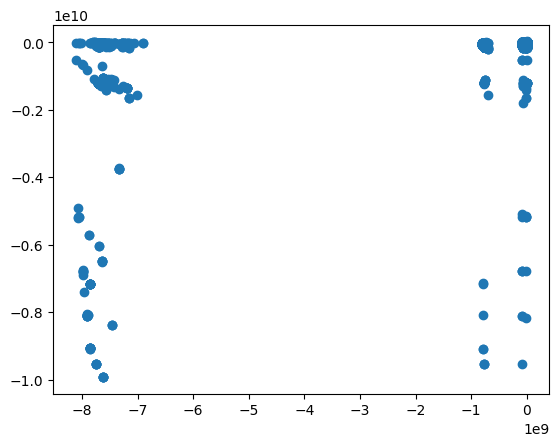

In [54]:
plt.scatter(x=lon, y=lat)

In [55]:
# importing modules
# from geopy.geocoders import Nominatim

# def location(dataframe):
#     # calling the nominatim tool
#     geoLoc = Nominatim(user_agent="GetLoc")
#     countries = []
#     fail_loc = []
    
#     for i in range(5):
#         # print("yo soy latitud: ",dataframe.iloc[i,0])
#         # print("yo soy longitud: ",dataframe.iloc[i,1])
#         latitud = dataframe.iloc[i,0]
#         longitud = dataframe.iloc[i,1]
#         try:
#             locname = geoLoc.reverse((latitud, longitud))
#             countries.append(locname)
#         except Exception:
#             fail_loc.append(i)
#     # printing the address/location name
#     # print(countries)
#     print(*countries, sep="\n")
#     print("FAIL COORDENADAS: ", fail_loc)
#     print(len(countries))

In [56]:
# location(peru[['Latitud_(Decimal)', 'Longitud_(Decimal)']])

In [57]:
peru[['Latitud_(Decimal)', 'Longitud_(Decimal)']].shape[0]

53254

In [58]:
peru[['Latitud_(Decimal)', 'Longitud_(Decimal)']]

,Latitud_(Decimal),Longitud_(Decimal)
0,-5163182.0,-80682388.0
1,-12115286.0,-77003768.0
2,-11235446.0,-74629221.0
3,-12126384.0,-76975707.0
4,-12089613.0,-76994475.0
...,...,...
53249,-12079598.0,-76976514.0
53250,-12088102.0,-77064252.0
53251,-12087071.0,-77035483.0
53252,-12030869.0,-77025853.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9f02da2b90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9f02d7b3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9f02da28f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9f02da3580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9f02da3820>],
 'means': []}

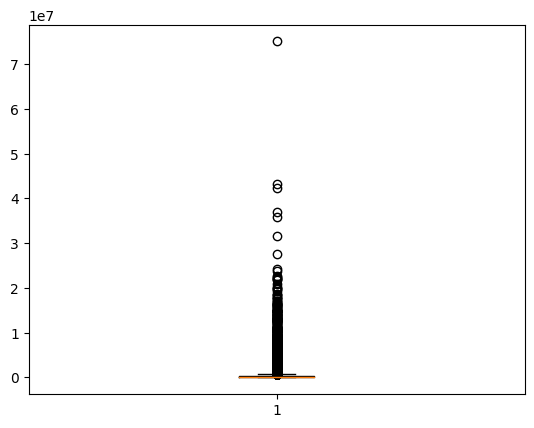

In [59]:
plt.boxplot(peru['Valor_comercial_(USD)'])

In [60]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%
Tipo_de_vía,5011,9.41
Piso,53233,99.96
Número_de_estacionamiento,7924,14.88
Depósitos,7993,15.01
Latitud_(Decimal),863,1.62
Longitud_(Decimal),917,1.72
Categoría_del_bien,2449,4.60
Posición,53141,99.79
Número_de_frentes,53157,99.82
Edad,4789,8.99


### Drop columns with the most NAN values and unnecessary columns

In [61]:
# Delete columns containing either 90% or more than 90% NaN Values
perc = 90.0
min_count =  int(((100-perc)/100)*peru.shape[0] + 1)
peru = peru.dropna( axis=1, thresh=min_count)


In [62]:
peru = peru.drop('Fecha_entrega_del_Informe', axis=1)

In [63]:
peru

,Tipo_de_vía,Departamento,Provincia,Distrito,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Categoría_del_bien,Edad,Estado_de_conservación,Método_Representado,Área_Terreno,Área_Construcción,Valor_comercial_(USD)
0,1.0,Piura,Piura,Veintiseis de Octubre,NaN,NaN,-5163182.0,-80682388.0,Vivienda Unifamiliar,0.0,En construcción,Costos o reposición (directo),62.50,27.58,25278.0
1,1.0,Lima,Lima,Surquillo,1.0,0.0,-12115286.0,-77003768.0,Departamento,1.0,Bueno,Comparación de mercado (directo),9.32,57.47,110807.0
2,1.0,Junín,Satipo,Satipo,0.0,0.0,-11235446.0,-74629221.0,Vivienda Unifamiliar,7.0,Regular,Costos o reposición (directo),126.00,84.00,42285.0
3,1.0,Lima,Lima,Santiago de Surco,0.0,0.0,-12126384.0,-76975707.0,Oficina,0.0,NaN,Comparación de mercado (directo),8.60,82.34,165503.0
4,3.0,Lima,Lima,Lima,0.0,0.0,-12089613.0,-76994475.0,Vivienda Unifamiliar,43.0,NaN,Comparación de mercado (directo),357.55,423.22,711009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,Lima,Lima,Santiago de Surco,0.0,0.0,-12079598.0,-76976514.0,Vivienda Unifamiliar,34.0,Bueno,Costos o reposición (directo),306.00,282.80,604241.0
53250,3.0,Lima,Lima,Magdalena del Mar,1.0,0.0,-12088102.0,-77064252.0,Departamento,4.0,Bueno,Comparación de mercado (directo),4.98,86.56,132721.0
53251,3.0,Lima,Lima,Lince,0.0,0.0,-12087071.0,-77035483.0,Departamento,64.0,Bueno,Comparación de mercado (directo),18.63,65.77,98655.0
53252,3.0,Lima,Lima,Rímac,1.0,0.0,-12030869.0,-77025853.0,Departamento,4.0,Bueno,Comparación de mercado (directo),10.08,70.15,79553.0


In [64]:
# peru = peru.drop('ID', axis=1)

### Check all missing values

In [65]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%
Tipo_de_vía,5011,9.41
Número_de_estacionamiento,7924,14.88
Depósitos,7993,15.01
Latitud_(Decimal),863,1.62
Longitud_(Decimal),917,1.72
Categoría_del_bien,2449,4.60
Edad,4789,8.99
Estado_de_conservación,15700,29.48
Método_Representado,7,0.01
Área_Terreno,1153,2.17


### Fill NaN Values

Tipo de via -> moda

Número de estacionamiento -> moda

Depósitos -> moda

Latitud -> Interpolation

Longitud -> Interpolation

Categoria del bien -> moda

Edad -> mean

Estado de conservacion -> moda

Metodo Representado -> moda

Area terreno -> moda

Area construccion -> moda


In [66]:
peru['Tipo_de_vía'].fillna(peru['Tipo_de_vía'].mode().iloc[0], inplace=True)

In [67]:
peru['Número_de_estacionamiento'].fillna(peru['Número_de_estacionamiento'].mode().iloc[0], inplace=True)

In [68]:
peru['Depósitos'].fillna(peru['Depósitos'].mode().iloc[0], inplace=True)

In [69]:
peru['Latitud_(Decimal)'] = peru['Latitud_(Decimal)'].interpolate(method='linear', axis=0)

In [70]:
peru['Longitud_(Decimal)'] = peru['Longitud_(Decimal)'].interpolate(method='linear', axis=0)

In [71]:
peru['Categoría_del_bien'].fillna(peru['Categoría_del_bien'].mode().iloc[0], inplace=True)

In [72]:
peru['Edad'].fillna(peru['Edad'].mode().iloc[0], inplace=True)

In [73]:
peru['Estado_de_conservación'].fillna(peru['Estado_de_conservación'].mode().iloc[0], inplace=True)

In [74]:
peru['Método_Representado'].fillna(peru['Método_Representado'].mode().iloc[0], inplace=True)

In [75]:
peru['Área_Terreno'].fillna(peru['Área_Terreno'].mode().iloc[0], inplace=True)

In [76]:
peru['Área_Construcción'].fillna(peru['Área_Construcción'].mode().iloc[0], inplace=True)

### Check all missing values again...

In [77]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%


### ok... no more missing values ! :D

### Visualizing the correlations between numerical variables

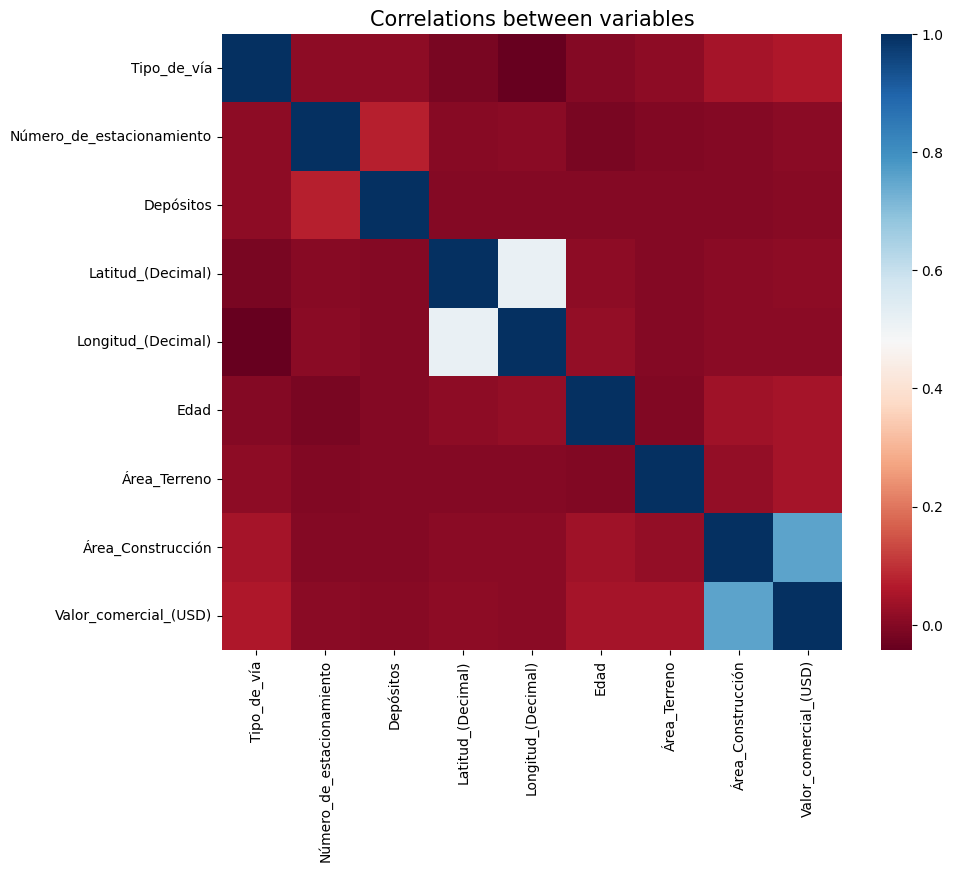

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(peru.corr(), cmap="RdBu")
plt.title("Correlations between variables", size=15)
plt.show()

In [79]:
peru

,Tipo_de_vía,Departamento,Provincia,Distrito,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Categoría_del_bien,Edad,Estado_de_conservación,Método_Representado,Área_Terreno,Área_Construcción,Valor_comercial_(USD)
0,1.0,Piura,Piura,Veintiseis de Octubre,0.0,0.0,-5163182.0,-80682388.0,Vivienda Unifamiliar,0.0,En construcción,Costos o reposición (directo),62.50,27.58,25278.0
1,1.0,Lima,Lima,Surquillo,1.0,0.0,-12115286.0,-77003768.0,Departamento,1.0,Bueno,Comparación de mercado (directo),9.32,57.47,110807.0
2,1.0,Junín,Satipo,Satipo,0.0,0.0,-11235446.0,-74629221.0,Vivienda Unifamiliar,7.0,Regular,Costos o reposición (directo),126.00,84.00,42285.0
3,1.0,Lima,Lima,Santiago de Surco,0.0,0.0,-12126384.0,-76975707.0,Oficina,0.0,Bueno,Comparación de mercado (directo),8.60,82.34,165503.0
4,3.0,Lima,Lima,Lima,0.0,0.0,-12089613.0,-76994475.0,Vivienda Unifamiliar,43.0,Bueno,Comparación de mercado (directo),357.55,423.22,711009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,Lima,Lima,Santiago de Surco,0.0,0.0,-12079598.0,-76976514.0,Vivienda Unifamiliar,34.0,Bueno,Costos o reposición (directo),306.00,282.80,604241.0
53250,3.0,Lima,Lima,Magdalena del Mar,1.0,0.0,-12088102.0,-77064252.0,Departamento,4.0,Bueno,Comparación de mercado (directo),4.98,86.56,132721.0
53251,3.0,Lima,Lima,Lince,0.0,0.0,-12087071.0,-77035483.0,Departamento,64.0,Bueno,Comparación de mercado (directo),18.63,65.77,98655.0
53252,3.0,Lima,Lima,Rímac,1.0,0.0,-12030869.0,-77025853.0,Departamento,4.0,Bueno,Comparación de mercado (directo),10.08,70.15,79553.0


In [80]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53254 entries, 0 to 53253
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo_de_vía                53254 non-null  float64
 1   Departamento               53254 non-null  object 
 2   Provincia                  53254 non-null  object 
 3   Distrito                   53254 non-null  object 
 4   Número_de_estacionamiento  53254 non-null  float64
 5   Depósitos                  53254 non-null  float64
 6   Latitud_(Decimal)          53254 non-null  float64
 7   Longitud_(Decimal)         53254 non-null  float64
 8   Categoría_del_bien         53254 non-null  object 
 9   Edad                       53254 non-null  float64
 10  Estado_de_conservación     53254 non-null  object 
 11  Método_Representado        53254 non-null  object 
 12  Área_Terreno               53254 non-null  float64
 13  Área_Construcción          53254 non-null  flo

In [81]:
peru.columns

Index(['Tipo_de_vía', 'Departamento', 'Provincia', 'Distrito',
       'Número_de_estacionamiento', 'Depósitos', 'Latitud_(Decimal)',
       'Longitud_(Decimal)', 'Categoría_del_bien', 'Edad',
       'Estado_de_conservación', 'Método_Representado', 'Área_Terreno',
       'Área_Construcción', 'Valor_comercial_(USD)'],
      dtype='object')

### One-Hot Encoding
Encoding the categorical features in X dataset by using One-Hot Encoding method

In [82]:
cat_cols = ["Departamento",
            "Provincia" ,
            "Distrito",
            "Categoría_del_bien",
            "Estado_de_conservación",
            "Método_Representado"]
peru = pd.get_dummies(peru, columns=cat_cols)

In [83]:
peru

,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Valor_comercial_(USD),Departamento_Amazonas,...,Estado_de_conservación_Bueno - Regular,Estado_de_conservación_En construcción,Estado_de_conservación_En proyecto,Estado_de_conservación_Malo,Estado_de_conservación_Muy bueno,Estado_de_conservación_Regular,Estado_de_conservación_Regular - Malo,Método_Representado_Comparación de mercado (directo),Método_Representado_Costos o reposición (directo),Método_Representado_Renta o capitalización (indirecto)
0,1.0,0.0,0.0,-5163182.0,-80682388.0,0.0,62.50,27.58,25278.0,0,...,0,1,0,0,0,0,0,0,1,0
1,1.0,1.0,0.0,-12115286.0,-77003768.0,1.0,9.32,57.47,110807.0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.0,0.0,-11235446.0,-74629221.0,7.0,126.00,84.00,42285.0,0,...,0,0,0,0,0,1,0,0,1,0
3,1.0,0.0,0.0,-12126384.0,-76975707.0,0.0,8.60,82.34,165503.0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.0,0.0,0.0,-12089613.0,-76994475.0,43.0,357.55,423.22,711009.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,0.0,0.0,-12079598.0,-76976514.0,34.0,306.00,282.80,604241.0,0,...,0,0,0,0,0,0,0,0,1,0
53250,3.0,1.0,0.0,-12088102.0,-77064252.0,4.0,4.98,86.56,132721.0,0,...,0,0,0,0,0,0,0,1,0,0
53251,3.0,0.0,0.0,-12087071.0,-77035483.0,64.0,18.63,65.77,98655.0,0,...,0,0,0,0,0,0,0,1,0,0
53252,3.0,1.0,0.0,-12030869.0,-77025853.0,4.0,10.08,70.15,79553.0,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
peru = pd.concat([peru, dpd_df])
peru.shape

(53254, 2611)

In [85]:
peru.fillna(0, inplace=True)

In [86]:
peru

,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Valor_comercial_(USD),Departamento_Amazonas,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
0,1.0,0.0,0.0,-5163182.0,-80682388.0,0.0,62.50,27.58,25278.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,-12115286.0,-77003768.0,1.0,9.32,57.47,110807.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,-11235446.0,-74629221.0,7.0,126.00,84.00,42285.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,0.0,-12126384.0,-76975707.0,0.0,8.60,82.34,165503.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0.0,0.0,-12089613.0,-76994475.0,43.0,357.55,423.22,711009.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,0.0,0.0,-12079598.0,-76976514.0,34.0,306.00,282.80,604241.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53250,3.0,1.0,0.0,-12088102.0,-77064252.0,4.0,4.98,86.56,132721.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53251,3.0,0.0,0.0,-12087071.0,-77035483.0,64.0,18.63,65.77,98655.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53252,3.0,1.0,0.0,-12030869.0,-77025853.0,4.0,10.08,70.15,79553.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%


In [88]:
peru.columns

Index(['Tipo_de_vía', 'Número_de_estacionamiento', 'Depósitos',
       'Latitud_(Decimal)', 'Longitud_(Decimal)', 'Edad', 'Área_Terreno',
       'Área_Construcción', 'Valor_comercial_(USD)', 'Departamento_Amazonas',
       ...
       'Distrito_raymondi', 'Distrito_sepahua', 'Distrito_tahuania',
       'Distrito_yurua', 'Distrito_padre abad', 'Distrito_irazola',
       'Distrito_curimana', 'Distrito_neshuya',
       'Distrito_alexander von humboldt', 'Distrito_purus'],
      dtype='object', length=2611)

### Splitting data X, y

In [89]:
y = peru['Valor_comercial_(USD)']

In [90]:
X = peru.drop(['Valor_comercial_(USD)'], axis=1)

In [91]:
X

,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Departamento_Amazonas,Departamento_Apurímac,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
0,1.0,0.0,0.0,-5163182.0,-80682388.0,0.0,62.50,27.58,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,-12115286.0,-77003768.0,1.0,9.32,57.47,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,-11235446.0,-74629221.0,7.0,126.00,84.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,0.0,-12126384.0,-76975707.0,0.0,8.60,82.34,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0.0,0.0,-12089613.0,-76994475.0,43.0,357.55,423.22,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,0.0,0.0,-12079598.0,-76976514.0,34.0,306.00,282.80,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53250,3.0,1.0,0.0,-12088102.0,-77064252.0,4.0,4.98,86.56,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53251,3.0,0.0,0.0,-12087071.0,-77035483.0,64.0,18.63,65.77,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53252,3.0,1.0,0.0,-12030869.0,-77025853.0,4.0,10.08,70.15,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Standardizing the Data
Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows

# $$ z=\frac{x-\mu}{\sigma} $$

In [92]:
important_num_cols = [
    "Tipo_de_vía",
    "Número_de_estacionamiento",
    "Depósitos",
    "Latitud_(Decimal)",
    "Longitud_(Decimal)",
    "Edad",
    "Área_Terreno",
    "Área_Construcción",
]

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [93]:
X

,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Departamento_Amazonas,Departamento_Apurímac,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
0,-0.825951,-0.120004,-0.024207,0.079974,0.063620,-0.440841,-0.021969,-0.256238,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,-0.825951,0.202384,-0.024207,0.058785,0.069714,-0.410360,-0.022083,-0.227276,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-0.825951,-0.120004,-0.024207,0.061467,0.073647,-0.227474,-0.021833,-0.201570,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,-0.825951,-0.120004,-0.024207,0.058751,0.069760,-0.440841,-0.022085,-0.203178,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.074017,-0.120004,-0.024207,0.058863,0.069729,0.869843,-0.021335,0.127117,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,-0.825951,-0.120004,-0.024207,0.058894,0.069759,0.595513,-0.021446,-0.008943,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53250,1.074017,0.202384,-0.024207,0.058868,0.069614,-0.318917,-0.022093,-0.199089,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53251,1.074017,-0.120004,-0.024207,0.058871,0.069661,1.509944,-0.022063,-0.219234,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53252,1.074017,0.202384,-0.024207,0.059042,0.069677,-0.318917,-0.022082,-0.214990,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Train-Test-Validation Split
Splitting the data into Train and Test chunks for better evaluation

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [96]:
train = pd.concat([pd.Series(y_train, index=X_train.index,
                            name='price', dtype=int), X_train], axis=1)

In [97]:
validation = pd.concat([pd.Series(y_val, index=X_val.index,
                            name='price', dtype=int), X_val], axis=1)

In [98]:
test = pd.concat([pd.Series(y_test, index=X_test.index,
                            name='price', dtype=int), X_test], axis=1)

In [99]:
train

,price,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Departamento_Amazonas,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
17136,69852,-0.825951,-0.120004,-0.024207,0.093239,0.184180,-0.136031,-0.022036,-0.199632,0.0,...,0,0,0,0,0,0,0,0,0,0
51262,106676,0.124033,-0.120004,-0.024207,0.058816,0.069719,0.077336,-0.021954,-0.180418,0.0,...,0,0,0,0,0,0,0,0,0,0
32199,199149,-0.825951,0.202384,0.088163,0.058654,0.184515,-0.440841,-0.022077,-0.197869,0.0,...,0,0,0,0,0,0,0,0,0,0
38405,1093598,0.124033,-0.120004,-0.024207,0.058952,0.072675,-0.410360,-0.020814,1.429368,0.0,...,0,0,0,0,0,0,0,0,0,0
28460,138903,1.074017,-0.120004,-0.024207,-0.273514,-1.078800,0.747919,-0.022038,-0.204254,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11919,719680,-0.825951,-0.120004,-0.024207,0.058924,0.069699,0.443108,-0.022029,-0.232576,0.0,...,0,0,0,0,0,0,0,0,0,0
32112,48443,1.074017,0.202384,-0.024207,0.059557,0.184509,-0.349398,-0.022047,-0.218720,0.0,...,0,0,0,0,0,0,0,0,0,0
47384,26074,-0.825951,-0.120004,-0.024207,0.079974,0.063620,-0.440841,-0.021960,-0.256238,0.0,...,0,0,0,0,0,0,0,0,0,0
11800,659368,1.074017,0.524773,0.200532,0.058745,0.184518,-0.440841,-0.021911,-0.049202,0.0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
test

,price,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Departamento_Amazonas,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
7481,189163,-0.825951,-0.120004,-0.024207,0.059463,0.184512,0.686957,-0.021631,-0.107194,0.0,...,0,0,0,0,0,0,0,0,0,0
24270,83863,1.074017,0.202384,-0.024207,0.058984,0.069587,-0.349398,-0.022071,-0.213885,0.0,...,0,0,0,0,0,0,0,0,0,0
16749,96350,2.024001,-0.120004,-0.024207,0.059019,0.069660,1.997640,-0.021816,-0.161843,0.0,...,0,0,0,0,0,0,0,0,0,0
17782,93607,1.074017,-0.120004,-0.024207,0.058964,0.184511,-0.410360,-0.022096,-0.232557,0.0,...,0,0,0,0,0,0,0,0,0,0
26869,50050,-0.825951,-0.120004,-0.024207,0.092058,0.184549,-0.440841,-0.022041,-0.219980,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,409742,-0.825951,-0.120004,-0.024207,0.058787,0.069733,-0.257955,-0.022030,-0.073581,0.0,...,0,0,0,0,0,0,0,0,0,0
43695,53160,-0.825951,-0.120004,-0.024207,0.059487,0.069662,0.168779,-0.022022,-0.198421,0.0,...,0,0,0,0,0,0,0,0,0,0
3563,339589,-0.825951,-0.120004,-0.024207,0.090205,0.185640,-0.410360,-0.016730,0.796536,0.0,...,0,0,0,0,0,0,0,0,0,0
38572,9255546,1.074017,-0.120004,-0.024207,0.070957,0.066350,-0.318917,-0.019288,11.234721,0.0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
validation

,price,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Departamento_Amazonas,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
6508,570398,1.074017,-0.120004,-0.024207,0.070989,0.066377,0.839362,-0.021623,0.270571,0.0,...,0,0,0,0,0,0,0,0,0,0
39151,47947,0.124033,-0.120004,-0.024207,0.075641,0.184631,-0.318917,-0.021584,-0.166223,0.0,...,0,0,0,0,0,0,0,0,0,0
21197,311118,-0.825951,-0.120004,-0.024207,0.058983,0.069768,0.412627,-0.021759,0.183065,0.0,...,0,0,0,0,0,0,0,0,0,0
45193,31920,-0.825951,-0.120004,-0.024207,0.059578,0.184499,-0.440841,-0.021845,-0.282962,0.0,...,0,0,0,0,0,0,0,0,0,0
41412,321133,1.074017,0.202384,-0.024207,0.058864,0.069744,-0.410360,-0.022066,-0.144218,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18113,303472,-0.825951,0.847162,-0.024207,0.045663,0.078783,0.168779,-0.021458,0.020126,0.0,...,0,0,0,0,0,0,0,0,0,0
32407,574352,1.074017,0.202384,-0.024207,0.058870,0.069874,0.138298,-0.020448,0.068448,0.0,...,0,0,0,0,0,0,0,0,0,0
22751,123614,1.074017,0.202384,0.088163,0.058653,0.069816,0.046855,-0.021830,0.008247,0.0,...,0,0,0,0,0,0,0,0,0,0
17634,1240230,-0.825951,-0.120004,-0.024207,0.059283,0.069607,-0.075069,-0.019954,1.049655,0.0,...,0,0,0,0,0,0,0,0,0,0


### Defining several evaluation functions for convenience

In [102]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y, predicitons):
    mae = mean_absolute_error(y, predicitons)
    mse = mean_squared_error(y, predicitons)
    rmse = np.sqrt(mean_squared_error(y, predicitons))
    r_squared = r2_score(y, predicitons)
    return mae, mse, rmse, r_squared

def save(model, type_model):
    filename = type_model + '.joblib'
    joblib.dump(model, filename)
    print("### model persisted ####" )

In [103]:
def plot_model_performance(y, predictions, model):
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    sns.regplot(x=predictions, y=y, ax=ax)
    ax.set_xlabel('Predicted price')
    ax.set_ylabel('Real price')
    ax.set_title('Behavior of {} model prediction'.format(model))
    plt.show()

In [104]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"])
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)


### Linear regression
The model is not penalized for its choice of weights, at all.

That means, during the training stage, if the model feels like one particular feature is particularly important, 
the model may place a large weight to the feature.

This sometimes leads to overfitting in small datasets.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)
save(lin_reg, 'linear_regression')

MAE: 32291310972412.965
MSE: 9.739330048533705e+29
RMSE: 986880441012674.2
R2 Score: -1.006107565359616e+18
------------------------------


In [ ]:
new_row = {"Model": ["LinearRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Ridge Regression

takes a step further and penalizes the model for the sum of squared value of the weights.

Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed.

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)
save(ridge, 'ridge_regression')

In [ ]:
new_row = {"Model": ["RigdeRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Lasso Regression
is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights.

Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros.

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)
save(lasso, 'lasso_regression')


In [ ]:
new_row = {"Model": ["LassoRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Elastic Net
is a hybrid of Lasso and Ridge, where both the absolute value penalization and squared penalization are included, being regulated with another coefficient l1_ratio:

In [ ]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)
save(elastic_net, 'elastic_net')

In [ ]:
new_row = {"Model": ["ENETRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Random Forest Regressor

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)
save(random_forest, 'random_forest')


In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,


'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [ ]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_depth= 20, bootstrap=True) 
randmf.fit( X_train, y_train)
predictions = randmf.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)
save(random_forest, 'random_forest')


In [ ]:
plot_model_performance(y_test, predictions, new_row['Model'])

In [ ]:
new_row = {"Model": ["RandomForestRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### XGBoost Regressor

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)
save(xgb, 'xgb_regressor')

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor



pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', XGBRegressor())])
pipeline.fit(X_train, y_train)

In [ ]:
pipeline.score(X_test, y_test)

In [ ]:
pipeline.get_params().keys()

In [ ]:
hyperparameter_grid = {
    'regressor__n_estimators': [100, 500, 1000, 2000],
    'regressor__max_depth': [3, 6, 9, 12],
    'regressor__learning_rate': [0.01, 0.03, 0.05, 0.1]
}


random_cv = sklearn.model_selection.RandomizedSearchCV(estimator=pipeline,
            param_distributions=hyperparameter_grid,
            cv=5, 
            n_iter=100,
            scoring = 'neg_root_mean_squared_error',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)



random_cv.fit(X_train, y_train)

In [ ]:
best_pipe = random_cv.best_estimator_

In [ ]:
best_pipe

In [ ]:
best_pipe.score(X_test, y_test)

In [ ]:
new_row = {"Model": ["XGBRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Model Comparison
The less the Root Mean Squared Error (RMSE), The better the model is.

In [ ]:
models.sort_values(by="RMSE (Cross-Validation)")

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()